# Basic example

1. "load" the Tracmip collection 
2. get some basic info on Tracmip collection
3. load monthly mean precip for the aquaControl simulation
4. plot meridional zonal-mean time-mean profile for one model

## 1. "Load" Tracmip collection

In [1]:
from intake import open_catalog

# get whole pangeo catalogue
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/climate.yaml")
# selet tracmip collection
col = cat.tracmip()

## 2. Basic info on the collection

print collection to screen: this shows that there is 3 output frequencies (monthly-mean, daily-mean, 3-hr snapshots), 
11 experiments (6 are due to the CALTECH model with changed atmosperic opacity), and 47 variables

In [2]:
col

pangeo-tracmip-ESM Collection with 7067 entries:
	> 3 frequency(s)

	> 11 experiment(s)

	> 14 model(s)

	> 47 variable(s)

	> 10 version(s)

	> 7067 source(s)

print starting and end portion of the collection

In [3]:
col.df.head()

,frequency,experiment,model,variable,version,source
0,A3hr,aqua4xCO2,AM21,hur,v20190116,gs://cmip6/tracmip/A3hr/aqua4xCO2/AM21/hur/v20...
1,A3hr,aqua4xCO2,AM21,hus,v20190116,gs://cmip6/tracmip/A3hr/aqua4xCO2/AM21/hus/v20...
2,A3hr,aqua4xCO2,AM21,ta,v20190116,gs://cmip6/tracmip/A3hr/aqua4xCO2/AM21/ta/v201...
3,A3hr,aqua4xCO2,AM21,ua,v20190116,gs://cmip6/tracmip/A3hr/aqua4xCO2/AM21/ua/v201...
4,A3hr,aqua4xCO2,AM21,va,v20190116,gs://cmip6/tracmip/A3hr/aqua4xCO2/AM21/va/v201...


In [4]:
col.df.tail()

,frequency,experiment,model,variable,version,source
7062,Amon,landOrbit,MetUM-ENT,uas,v20180423,gs://cmip6/tracmip/Amon/landOrbit/MetUM-ENT/ua...
7063,Amon,landOrbit,MetUM-ENT,va,v20180423,gs://cmip6/tracmip/Amon/landOrbit/MetUM-ENT/va...
7064,Amon,landOrbit,MetUM-ENT,vas,v20180423,gs://cmip6/tracmip/Amon/landOrbit/MetUM-ENT/va...
7065,Amon,landOrbit,MetUM-ENT,wap,v20180423,gs://cmip6/tracmip/Amon/landOrbit/MetUM-ENT/wa...
7066,Amon,landOrbit,MetUM-ENT,zg,v20180423,gs://cmip6/tracmip/Amon/landOrbit/MetUM-ENT/zg...


print some further information on the collection (i.e., dataframe)

In [5]:
col.df.columns.unique()

Index(['frequency', 'experiment', 'model', 'variable', 'version', 'source'], dtype='object')

In [6]:
col.df.model.unique()


array(['AM21', 'CAM4', 'CAM5Nor', 'CNRM-AM5', 'ECHAM61', 'ECHAM63',
       'GISS-ModelE2', 'MIROC5', 'MPAS', 'MetUM-CTL', 'MetUM-ENT', 'CAM3',
       'LMDZ5A', 'CALTECH'], dtype=object)

In [7]:
col.df.experiment.unique()

array(['aqua4xCO2', 'aquaControl', 'land4xCO2', 'landControl',
       'landOrbit', 'aquaAbs07', 'aquaAbs15', 'aquaAbs20', 'landAbs07',
       'landAbs15', 'landAbs20'], dtype=object)

## 3. Now actually load the monthly-mean precip data for the aquaControl experiment, use a dictionary for this

note: the option "zarr_kwargs={'consolidated': True}" for to_dataset_dicts does not seem necessary but is still included here

In [8]:
ds_dict = col.search(frequency="Amon", experiment="aquaControl",
                     variable="pr").to_dataset_dict(zarr_kwargs={'consolidated': True})

Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'model.experiment.frequency'
             
--> There are 14 group(s)


## 4. Plot zonal-mean time-mean precip for last 20 years for CNRM-AM5 model

In [9]:
import matplotlib.pyplot as plt

In [10]:
ds_dict['CNRM-AM5.aquaControl.Amon']['pr']

<xarray.DataArray 'pr' (time: 360, lat: 128, lon: 256)>
dask.array<zarr, shape=(360, 128, 256), dtype=float32, chunksize=(360, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2008-12-16T12:00:00
Attributes:
    associated_files:  baseURL: https://www.sites.google.com/site/tracmip/ gr...
    cell_measures:     area: areacella
    cell_methods:      time: mean
    comment:           at surface; includes both liquid and solid phases from...
    long_name:         Precipitation
    original_name:     pr
    standard_name:     precipitation_flux
    units:             kg m-2 s-1

Text(0.5, 1.0, 'CNRM-AM5.aquaControl.Amon')

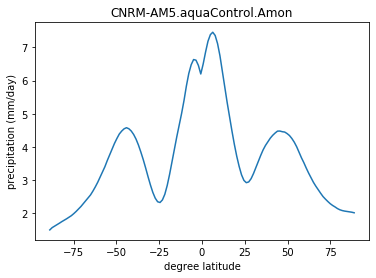

In [11]:
plt.plot(ds_dict['CNRM-AM5.aquaControl.Amon'].lat, 
         ds_dict['CNRM-AM5.aquaControl.Amon']['pr'].isel(time=slice(120,360)).mean(['lon', 'time'])*86400)
plt.xlabel('degree latitude')
plt.ylabel('precipitation (mm/day)')
plt.title('CNRM-AM5.aquaControl.Amon')